# 1.0 AIMon - Model Training Notebook

This notebook demonstrates the process of training a simple anomaly detection model on synthetic system latency data. The goal is to identify unusual spikes in latency that could indicate infrastructure issues.

**Workflow:**
1.  **Load & Explore Data:** We'll start by loading our sample CSV and visualizing it.
2.  **Train Model:** An `IsolationForest` model will be trained on the latency data.
3.  **Save Model:** The trained model will be saved to a `.joblib` file for use in our API.

In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load and Prepare Data
df = pd.read_csv('../data/sample_latency_data.csv', parse_dates=['timestamp'], index_col='timestamp')
print("--- Data Sample ---")
print(df.head())

# The model needs a 2D array, so we reshape our latency column.
X = df[['latency_ms']]

# Step 3: Train the Anomaly Detection Model
# We use Isolation Forest, a simple and effective algorithm for this use case.
# `contamination` is the expected proportion of anomalies in the data.
model = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
model.fit(X)

print("\nModel training complete.")


--- Data Sample ---
                     latency_ms
timestamp                      
2025-06-14 09:15:00          52
2025-06-14 09:15:01          48
2025-06-14 09:15:02          55
2025-06-14 09:15:03         195
2025-06-14 09:15:04          51

Model training complete.


In [3]:
# Step 3: Train the Anomaly Detection Model
# We use Isolation Forest, a simple and effective algorithm for this use case.
# `contamination` is the expected proportion of anomalies in the data.
model = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
model.fit(X)

print("\nModel training complete.")


Model training complete.


In [4]:
# Step 4: Save the Trained Model
# We save the model object to a file using joblib for later use in our API.
model_path = '../models/isolation_forest.joblib'
joblib.dump(model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: ../models/isolation_forest.joblib



--- Data with Anomaly Predictions ---
                     latency_ms is_anomaly
timestamp                                 
2025-06-14 09:15:00          52     Normal
2025-06-14 09:15:01          48     Normal
2025-06-14 09:15:02          55     Normal
2025-06-14 09:15:03         195    Anomaly
2025-06-14 09:15:04          51     Normal
2025-06-14 09:15:05          49     Normal
2025-06-14 09:15:06          53     Normal
2025-06-14 09:15:07          50     Normal
2025-06-14 09:15:08         250    Anomaly
2025-06-14 09:15:09          47     Normal
2025-06-14 09:15:10          54     Normal


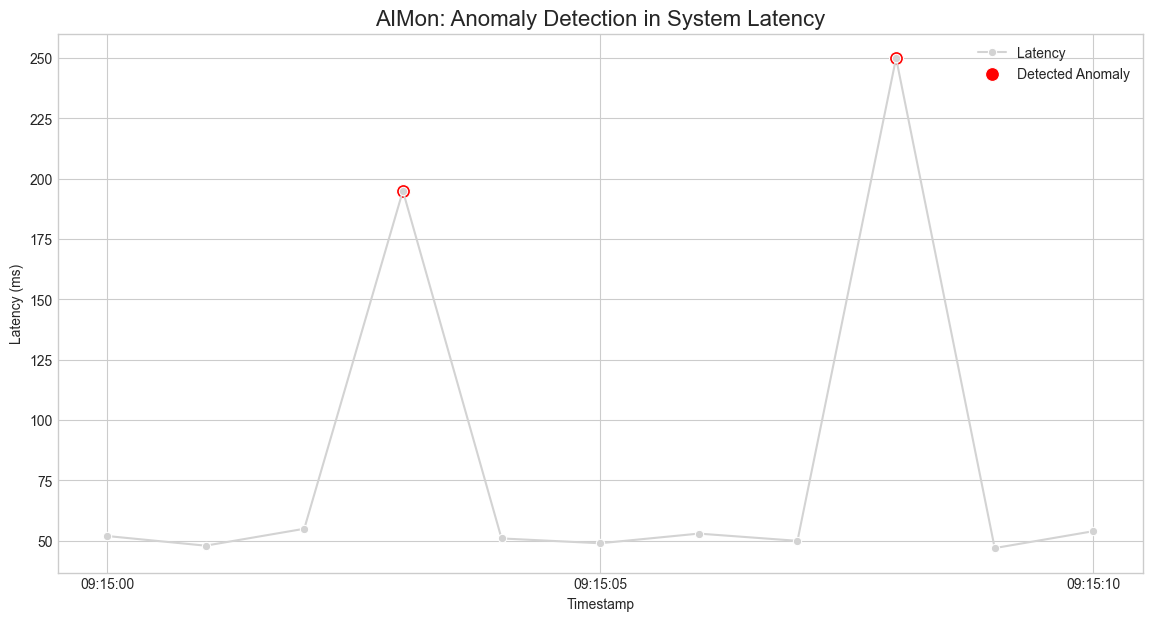

In [5]:
# Step 5: Visualize the Results
# Let's see what the model predicts for our training data.
# -1 indicates an anomaly, 1 indicates a normal point.
predictions = model.predict(X)
df['is_anomaly'] = ['Anomaly' if p == -1 else 'Normal' for p in predictions]

print("\n--- Data with Anomaly Predictions ---")
print(df)

# Create a plot to visualize the anomalies
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='latency_ms', marker='o', color='lightgray', label='Latency')
anomalies = df[df['is_anomaly'] == 'Anomaly']
sns.scatterplot(data=anomalies, x=anomalies.index, y='latency_ms', color='red', s=100, label='Detected Anomaly')

plt.title('AIMon: Anomaly Detection in System Latency', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()